# Applying Tabular Methods

## Double Q Learning

### For Stochastic Environment

In [ ]:
env = SquirrelPet_stoch()
epsilon = 1.0  
epsilon_min = 0.01  
gamma = 0.95 
alpha = 0.15 
decay_rate = 0.995  
total_episodes = 1000
max_timestamp = 10

qt1 = np.zeros((env.obs_space.n, env.action_space.n))  # Q-table 1 initialization
qt2 = np.zeros((env.obs_space.n, env.action_space.n))  # Q-table 2 initialization

rewards_epi = []
epsilon_values = []
steps_per_episode = []
penalties_per_episode = []

final_state = None

for episode in range(total_episodes):
    state, _ = env.reset()
    state_index = env.obs_space_to_index(state)
    total_rewards = 0
    total_steps = 0

    while True:
        total_steps += 1
        action = env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax((qt1[state_index] + qt2[state_index]) / 2)
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_strt_idx = env.obs_space_to_index(next_state)
        if np.random.uniform(0, 1) < 0.5:
            qt1[state_index, action] += alpha * (reward + gamma * qt2[next_strt_idx, np.argmax(qt1[next_strt_idx])] - qt1[state_index, action])
        else:
            qt2[state_index, action] += alpha * (reward + gamma * qt1[next_strt_idx, np.argmax(qt2[next_strt_idx])] - qt2[state_index, action])
        state_index = next_strt_idx
        total_rewards += reward
        if terminated or truncated or total_steps >= max_timestamp:
            break

    penalties_per_episode.append(env.get_penalty_count())
    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}")
        print("Q-table 1:")
        print(qt1)
        print("Q-table 2:")
        print(qt2)
        avg_penalty = np.mean(penalties_per_episode[-100:])
        print(f"Average Penalties in Last 100 Episodes: {avg_penalty}")

    epsilon = max(epsilon_min, epsilon * decay_rate)
    epsilon_values.append(epsilon)
    rewards_epi.append(total_rewards)
    steps_per_episode.append(total_steps)

    if (episode + 1) % 100 == 0:
        average_steps = np.mean(steps_per_episode[-100:])
        print(f"Episode: {episode + 1}, Average Steps: {average_steps}")

    if episode == total_episodes - 1:
        final_state = env.state

Requested Action: 1, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 0, Chosen Action: 0
Requested Action: 3, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 1, Chosen Action: 1
Requested Action: 3, Chosen Action: 3
Requested Action: 3, Chosen Action: 3
Requested Action: 0, Chosen Action: 0
Requested Action: 3, Chosen Action: 3
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Ac

In [ ]:
import pickle

# Assuming the above loop has been executed and qt1, qt2, rewards_epi, epsilon_values, steps_per_episode, and penalties_per_episode are populated

# Creating a dictionary to hold everything
data_to_save = {
    "qt1": qt1,
    "qt2": qt2,
    "rewards_epi": rewards_epi,
    "epsilon_values": epsilon_values,
    "steps_per_episode": steps_per_episode,
    "penalties_per_episode": penalties_per_episode,
    "final_state": final_state
}

# Saving to a pickle file
with open('q_tables_and_stats.pkl', 'wb') as f:
    pickle.dump(data_to_save, f)

print("Data saved to q_tables_and_stats.pkl")


Data saved to q_tables_and_stats.pkl


In [ ]:
print("Trained Q-table 1:")
print(qt1)
print("Trained Q-table 2:")
print(qt2)

Trained Q-table 1:
[[ 4.30380870e+02  3.95137780e+02  4.80762957e+02  3.99800136e+02]
 [ 5.21702532e+02  3.26663309e+02  2.90226925e+02  3.05498620e+02]
 [ 1.36493780e+02  2.35449326e+02  5.02968503e+02  2.84073514e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.40985516e+02  1.75434987e+02  5.07540895e+02  2.01125542e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.06061608e+02  3.72694501e+02  3.12477886e+02  4.96121395e+02]
 [ 8.81896032e+01  4.89492470e+02  2.34928882e+02  1.49704853e+02]
 [ 1.18517201e+02  7.87945230e+00  4.25369081e+02  2.02154156e+01]
 [ 3.22092951e+01  4.97076694e+02  1.24216012e+02  6.13065758e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.41716404e+01  4.29680895e+02  2.70269324e-01  7.77425325e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.20152067e-01  3.07478118e+02  5.94255860e+01  4.34374651e+01]
 [ 1.03641464e+01  1.36822055e+01  2.912405

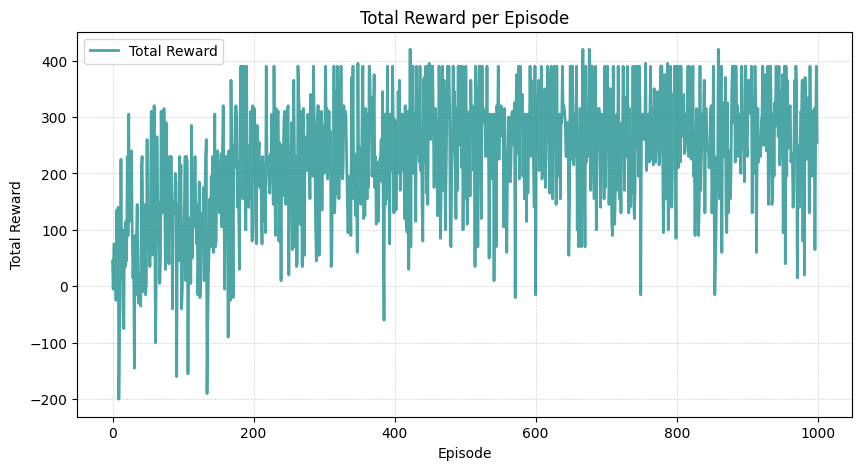

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(rewards_epi, color='Teal', linestyle='-', linewidth=2, alpha=0.7, label='Total Reward')
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
plt.legend(loc='upper left')
plt.show()

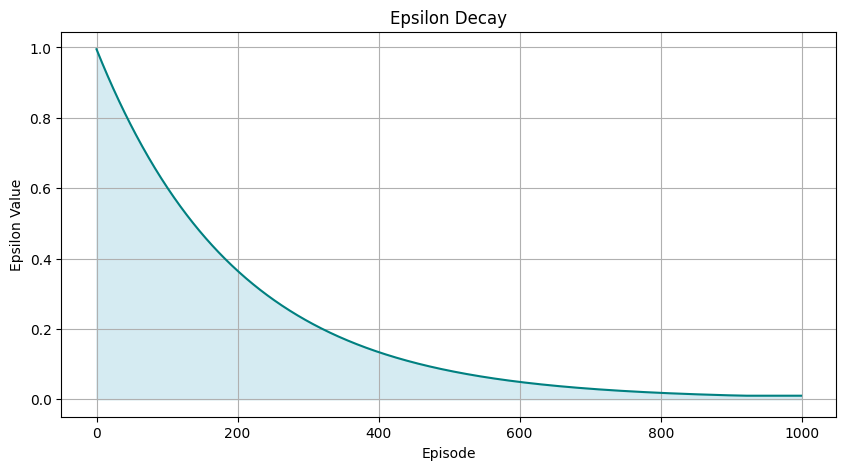

In [ ]:

plt.figure(figsize=(10, 5))
plt.plot(epsilon_values, color='Teal', label='Decay')
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.fill_between(range(len(epsilon_values)), epsilon_values, color="lightblue", alpha=0.5)
plt.grid(True)
plt.show()

Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 2
Requested Action: 1, Chosen Action: 3
Requested Action: 3, Chosen Action: 3
Requested Action: 2, Chosen Action: 2
Requested Action: 3, Chosen Action: 2
Requested Action: 1, Chosen Action: 0
Requested Action: 1, Chosen Action: 1
Requested Action: 2, Chosen Action: 1
Requested Action: 2, Chosen Action: 2
Requested Action: 0, Chosen Action: 1
Requested Action: 0, Chosen Action: 0
Requested Action: 2, Chosen Action: 0
Requested Action: 1, Chosen Action: 2
Requested Ac

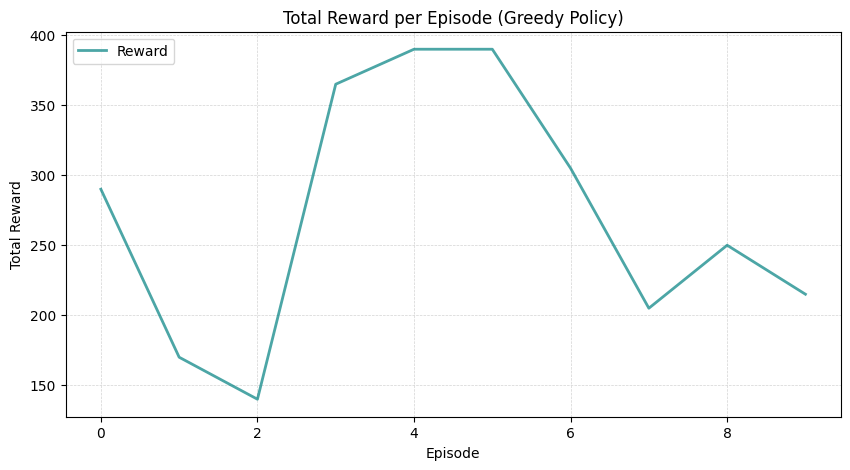

In [ ]:
greedy_rewards = []
for _ in range(10):
    state, _ = env.reset()
    state_index = env.obs_space_to_index(state)
    total_greedy_rewards = 0
    while True:
        action = np.argmax((qt1[state_index] + qt2[state_index]) / 2)
        next_state, reward, terminated, truncated, _ = env.step(action)
        state_index = env.obs_space_to_index(next_state)
        total_greedy_rewards += reward

        if terminated or truncated:
            break

    greedy_rewards.append(total_greedy_rewards)


plt.figure(figsize=(10, 5))
plt.plot(greedy_rewards, color='Teal', linestyle='-', linewidth=2, alpha=0.7, label='Reward')
plt.title('Total Reward per Episode (Greedy Policy)')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
plt.legend(loc='upper left')
plt.show()